Step 1 - Clone this repository (Link:
https://github.com/PearlMiglani/GreyBox_ModelEstimation)


Step 2 - Install Casadi

In [ ]:
!pip install casadi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 12.9 MB/s eta 0:00:00


Step 3 - Install ipopt

In [ ]:
!pip install ipopt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


Step 4 - Run files from reference folder

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:   120014
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    60010

Total number of variables............................:    50010
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equality constraints.................:    30004
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.16e+00 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

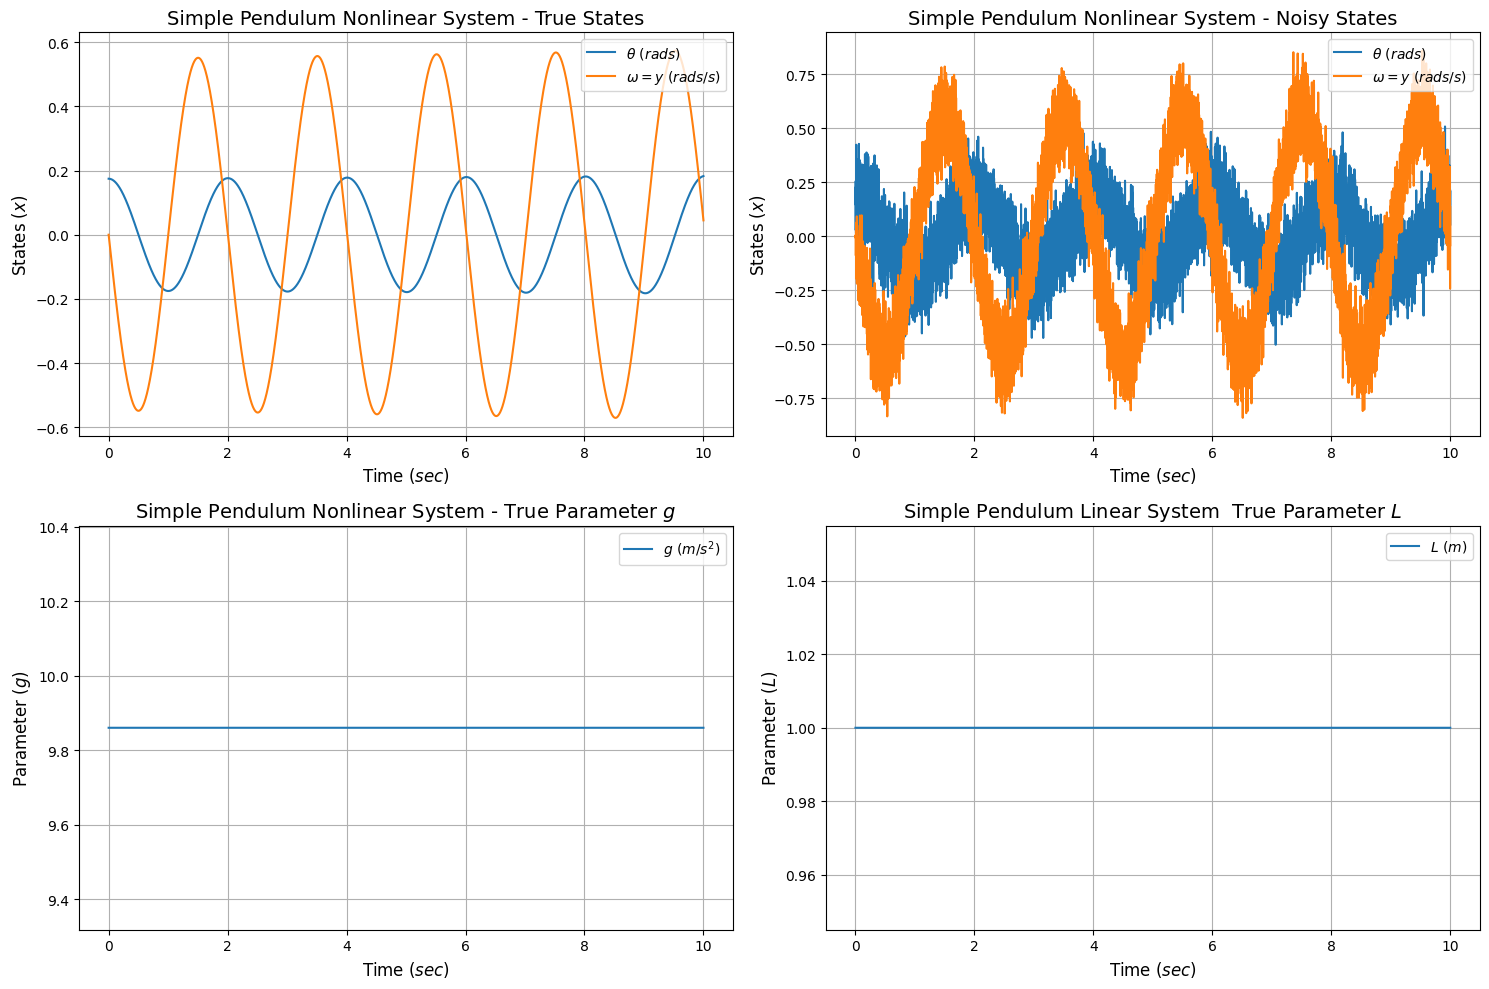

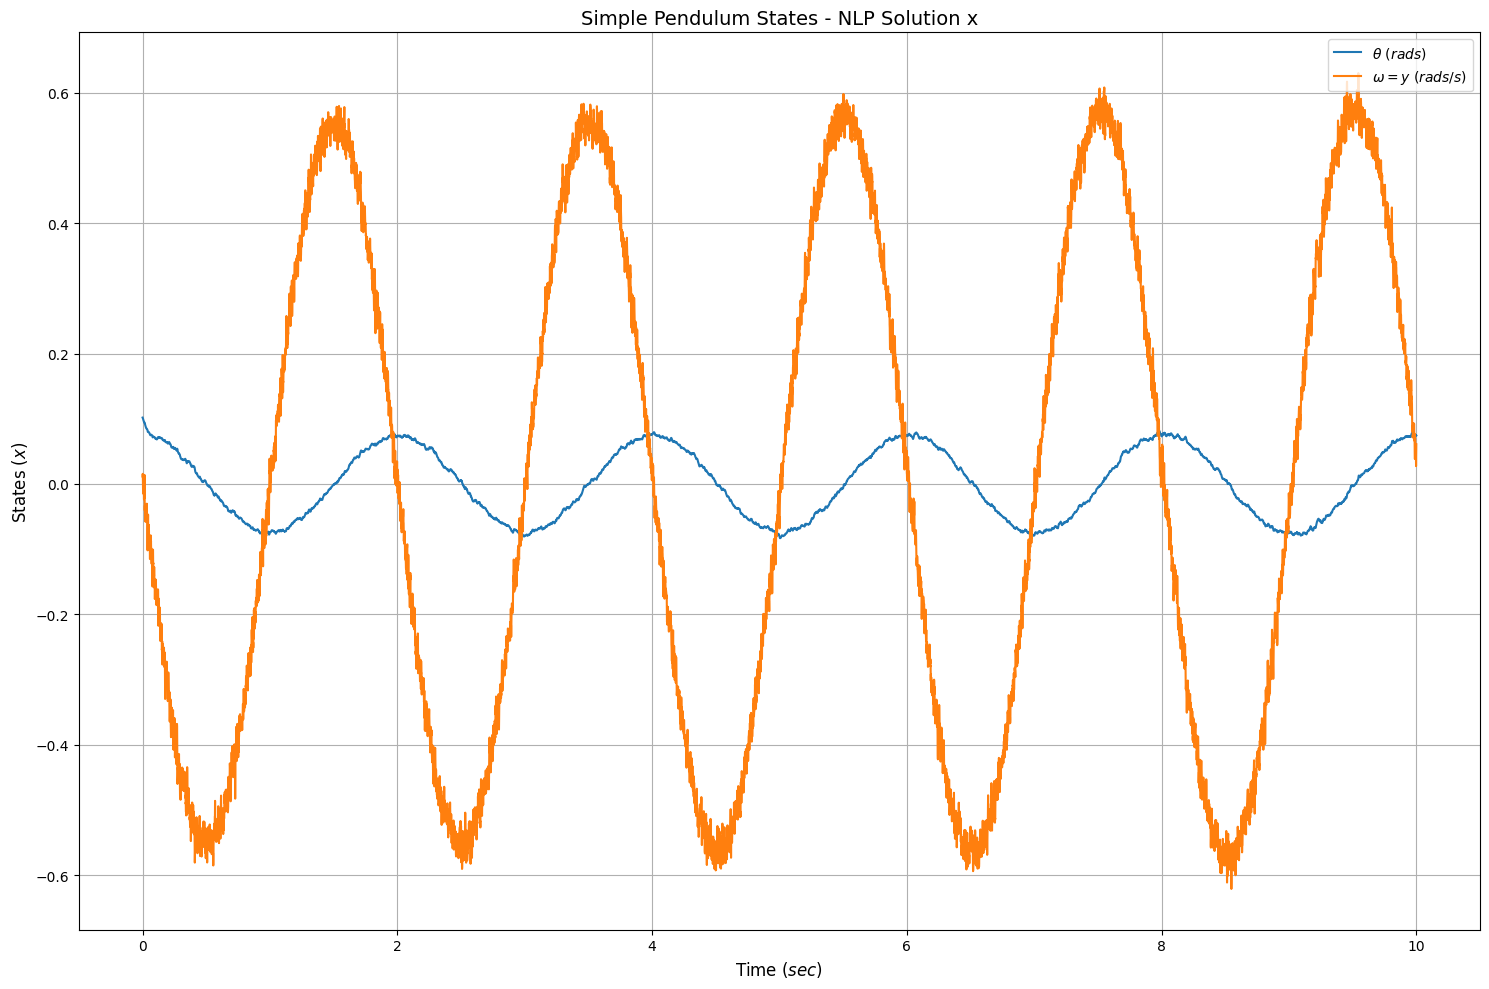

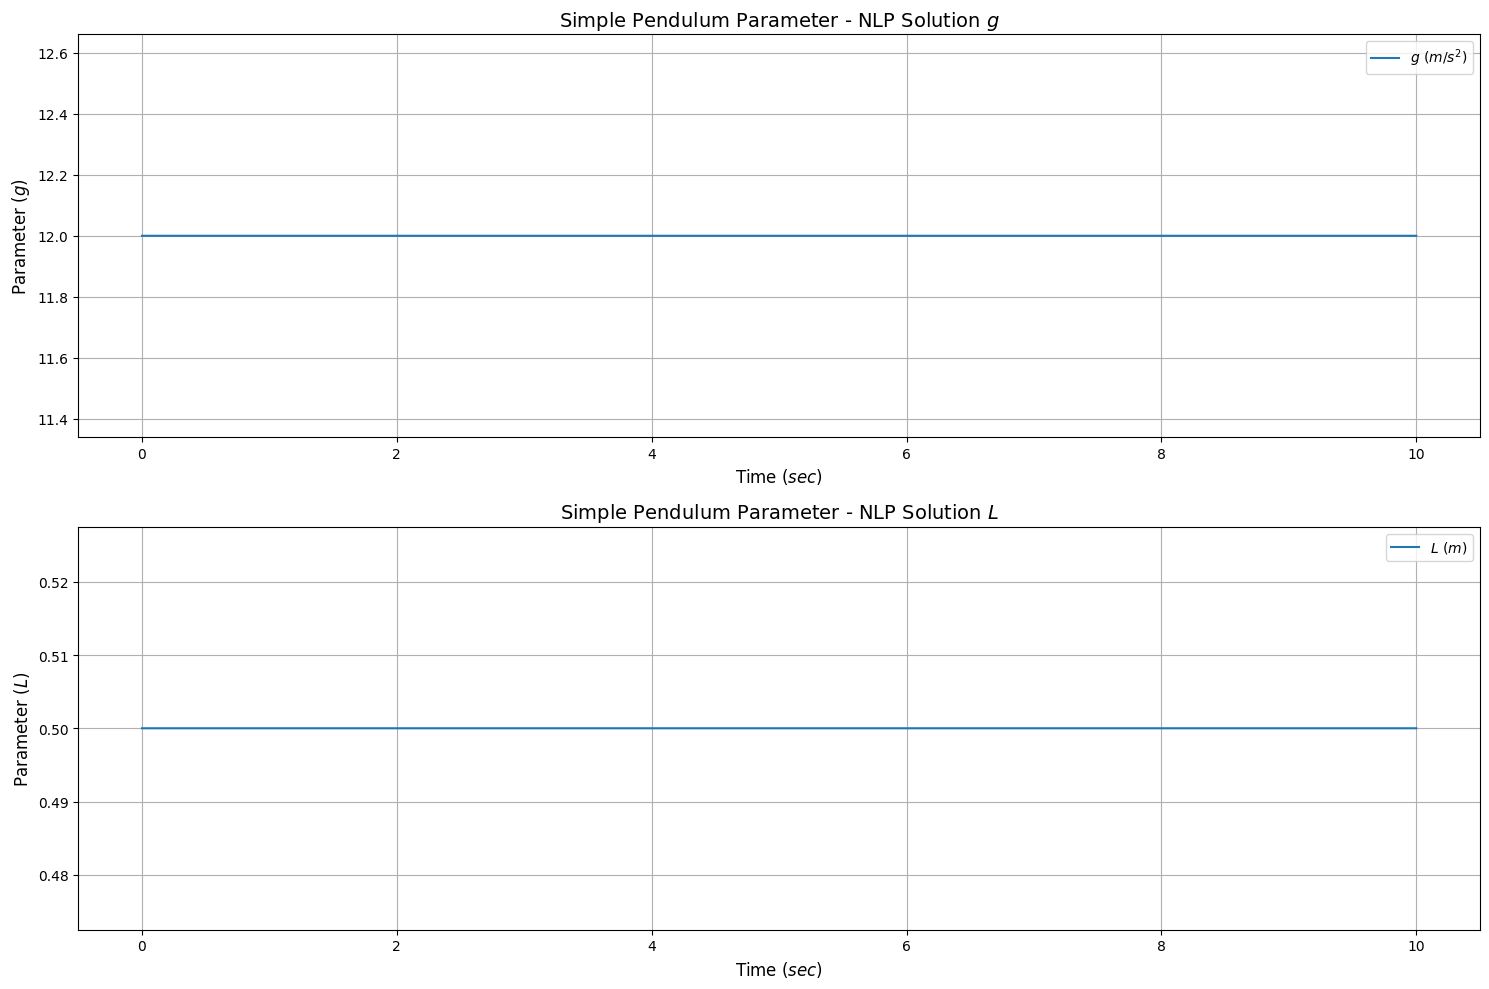

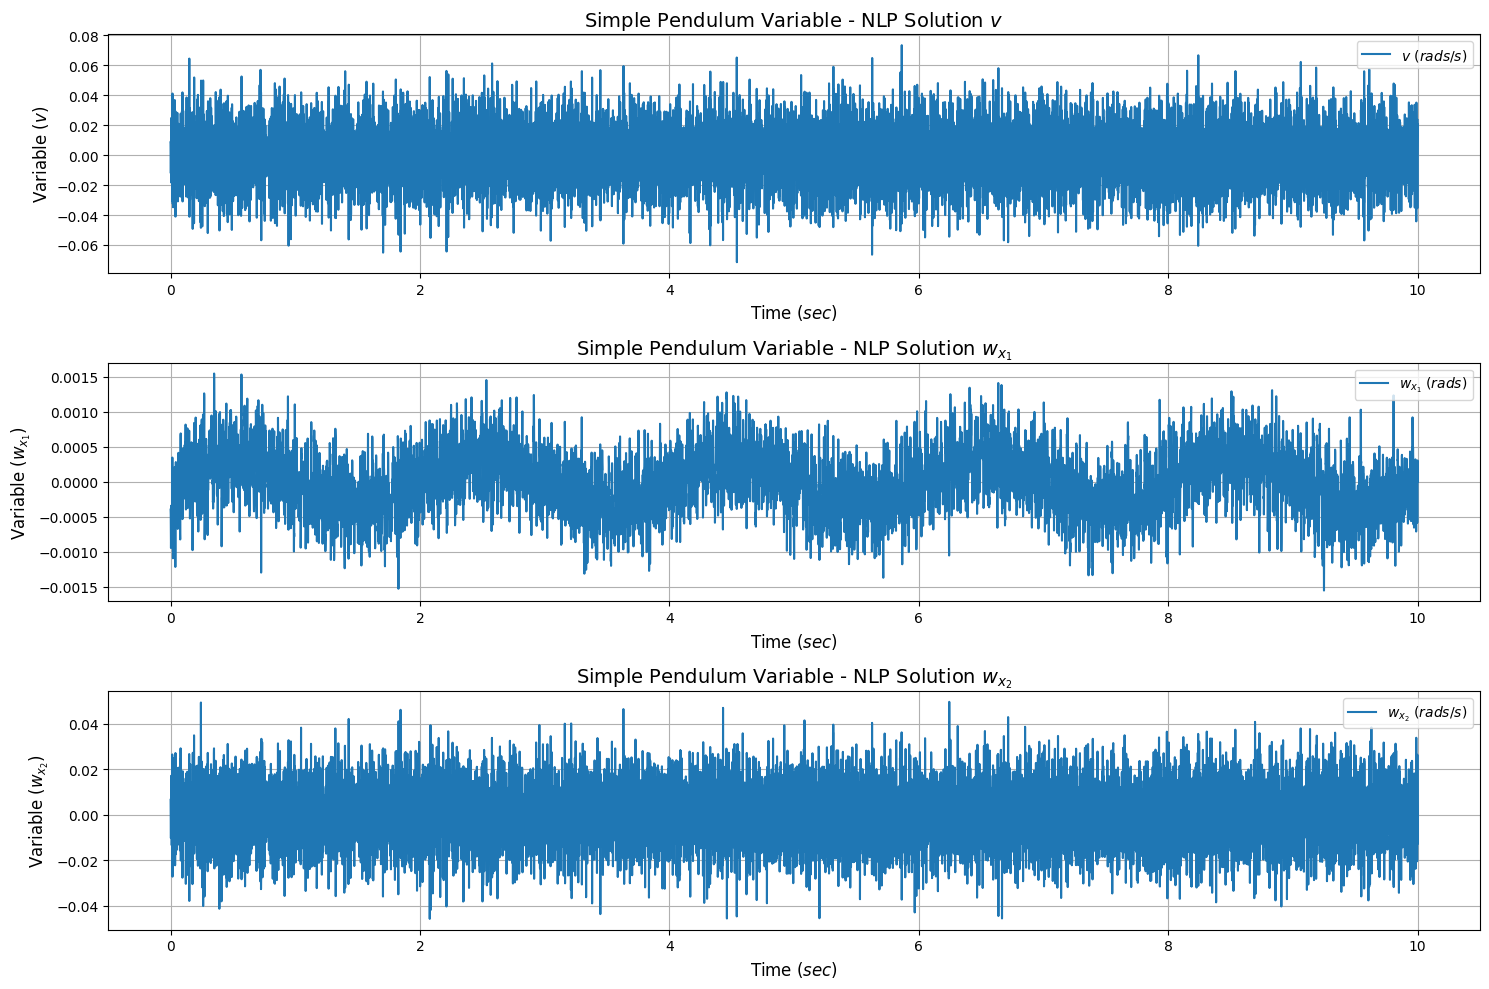

In [ ]:
## Importing external modules
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from casadi import *


#--------------------------------------------------------------Defining True System----------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
# Defining the Simple Pendulum Discrete-Time Nonlinear System Function
def SimplePendulum_f(x_k_1, u_k_1):
    """Provides discrete time dynamics for a nonlinear simple pendulum system

    Args:
        x_k_1 (numpy.array): Previous system state
        u_k_1 (numpy.array): Previous system measurement

    Returns:
        x_k_true (numpy.array): Current true system state
        x_k (numpy.array): Current noise corrupted system state
    """

    # Simulation parameters
    g = 9.86
    L = 1.
    Q = 0.01
    R = 0.001
    ts = 0.001

    # Create the true Q and R matrices
    Q = np.reshape(np.array([[Q, 0],[0, Q]]), (2,2))
    R = np.reshape(np.array([R]), (1,1))

    # Getting individual state components
    theta_k_1 = x_k_1[0,0]
    omega_k_1 = x_k_1[1,0]

    # Computing current true system state
    theta_k = theta_k_1 + ts*(omega_k_1)
    omega_k = omega_k_1 + ts*(-(g/L)*np.sin(theta_k_1))

    x_k_true = np.reshape(np.array([theta_k, omega_k]),(2,1))

    # Computing Process/Measurement Noise
    q_k_1 = np.random.multivariate_normal(np.array([0,0]), Q)
    q_k_1 = np.reshape(q_k_1, (2,1))

    # Computing noise corrupted system state/measurement
    x_k = x_k_true + q_k_1

    # Return statement
    return x_k_true, x_k

# Defining the Simple Pendulum Discrete-Time Nonlinear Measurement Function
def SimplePendulum_h(x_k_1):
    """Provides discrete time dynamics for a nonlinear simple pendulum system

    Args:
        x_k_1 (numpy.array): Previous system state

    Returns:
        y_k_true (numpy.array): Current true system measurement
        y_k (numpy.array): Current noise corrupted system measurement
    """

    # Simulation parameters
    g = 9.86
    L = 1.
    Q = 0.01
    R = 0.001

    # Create the true Q and R matrices
    Q = np.reshape(np.array([[Q, 0],[0, Q]]), (2,2))
    R = np.reshape(np.array([R]), (1,1))

    # Getting individual state components
    theta_k_1 = x_k_1[0,0]
    omega_k_1 = x_k_1[1,0]

    # Computing current true system state
    omega_k = omega_k_1

    # Computing current true system measurement
    y_k_true = omega_k
    y_k_true = np.reshape(y_k_true,(1,1))

    # Computing Process/Measurement Noise
    r_k = np.random.multivariate_normal(np.array([0]), R)

    # Computing noise corrupted system state/measurement
    y_k = y_k_true + r_k

    # Return statement
    return y_k_true, y_k


#--------------------------------------------------------------Defining System Model---------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
# Defining the Simple Pendulum Discrete-Time Nonlinear System Function
def SimplePendulum_f1(x_k_1, u_k_1):
    """Provides discrete time dynamics for a nonlinear simple pendulum system

    Args:
        x_k_1 (numpy.array): Previous system state
        u_k_1 (numpy.array): Previous system measurement

    Returns:
        x_k_true (numpy.array): Current true system state
        x_k (numpy.array): Current noise corrupted system state
    """

    # Simulation parameters
    ts = 0.001

    # Getting individual state components
    theta_k_1 = x_k_1[0,0]
    omega_k_1 = x_k_1[1,0]

    # Getting the parameter components
    g_k_1 = x_k_1[2,0]
    L_k_1 = x_k_1[3,0]

    # Computing current true system state
    theta_k = theta_k_1 + ts*(omega_k_1)
    omega_k = omega_k_1 + ts*(-(g_k_1/L_k_1)*np.sin(theta_k_1))

    # Computing current true system parameters
    g_k = g_k_1
    L_k = L_k_1

    x_k_true = np.reshape(np.array([theta_k, omega_k, g_k, L_k]),(4,1))

    # Return statement
    return x_k_true

# Defining the Simple Pendulum Discrete-Time Nonlinear Measurement Function
def SimplePendulum_h1(x_k_1):
    """Provides discrete time dynamics for a nonlinear simple pendulum system

    Args:
        x_k_1 (numpy.array): Previous system state

    Returns:
        y_k_true (numpy.array): Current true system measurement
        y_k (numpy.array): Current noise corrupted system measurement
    """

    # Simulation parameters

    # Getting individual state components
    theta_k_1 = x_k_1[0,0]
    omega_k_1 = x_k_1[1,0]

    # Computing current true system state
    omega_k = omega_k_1

    # Computing current true system measurement
    y_k_true = omega_k
    y_k_true = np.reshape(y_k_true,(1,1))

    # Return statement
    return y_k_true


#----------------------------------------------------------Defining System Model Jacobian----------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
# Defining the Simple Pendulum Discrete-Time Linearized System Function
def SimplePendulum_F(x_k_1, u_k_1):
    """Provides discrete time dynamics for a nonlinear simple pendulum system

    Args:
        x_k_1 (numpy.array): Previous system state
        u_k_1 (numpy.array): Previous system measurement

    Returns:
        F (numpy.array): System linearized Dynamics Jacobian
    """

    # Getting individual state components
    theta_k_1 = x_k_1[0,0]
    omega_k_1 = x_k_1[1,0]

    # Getting the parameter components
    g_k_1 = x_k_1[2,0]
    L_k_1 = x_k_1[3,0]

    # Computing System State Jacobian
    F = np.reshape(np.array([[0, 1, 0, 0],[-(g_k_1/L_k_1)*np.cos(theta_k_1), 0, -(1/L_k_1)*np.sin(theta_k_1), (g_k_1/L_k_1**2)*np.sin(theta_k_1)], [0, 0, 0, 0], [0, 0, 0, 0]]),(4,4))


    # Return statement
    return F

# Defining the Simple Pendulum Discrete-Time Linearized Measurement Function
def SimplePendulum_H(x_k_1):
    """Provides discrete time dynamics for a nonlinear simple pendulum system

    Args:
        x_k_1 (numpy.array): Previous system state

    Returns:
        H (numpy.array): System linearized Measurement Jacobian
    """

    # Getting individual state components
    theta_k_1 = x_k_1[0,0]
    omega_k_1 = x_k_1[1,0]

    # Computing System State Jacobian
    H = np.reshape(np.array([0, 1, 0, 0]),(1,4))


    # Return statement
    return H

#------------------------------------------------------------Simulation of True System-------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------#
## System Setup

# True initial states of the system
theta_ini_deg_true = 10.
omega_ini_rads_true = 0.

# True Parameters of the System
g_true = 9.86
L_true = 1.0

# Input to the system
u = 0

## Time Simulation Control Setup

# Discrete Time-Step
ts = 0.001

# Start Time
T_start = 0.

# Final Time
T_final = 10.

## Plotting Setup

# Plot Size parameters
Plot_Width = 15
Plot_Height = 10

## Basic Computation

# Convert initial theta to radians
theta_ini_rad_true = float(np.radians(theta_ini_deg_true))

# Create the true initial state vector
x_ini_true = np.reshape(np.array([theta_ini_rad_true, omega_ini_rads_true]), (2,1))

# Create the input vector
u_k = np.reshape(np.array([u]), (1,1))

# Create time vector
time_vector = np.arange(T_start, T_final+ts, ts)

## System Simulation

# Initializing system true state array to store time evolution
x_sim_nonlinear_true = x_ini_true

# Initializing system noisy state array to store time evolution
x_sim_nonlinear_noisy = x_ini_true

# Initializing system true measurement array to store time evolution
y_sim_nonlinear_true = np.reshape(x_ini_true[1,0],(1,1))

# Initializing system noisy measurement array to store time evolution
y_sim_nonlinear_noisy = np.reshape(x_ini_true[1,0],(1,1))

# FOR LOOP: For each discrete time-step
for ii in range(time_vector.shape[0]):

    # Computing next state of the Linear system
    x_k_true, x_k = SimplePendulum_f(np.reshape(x_sim_nonlinear_true[:,ii],(2,1)), u_k)

    y_k_true, y_k = SimplePendulum_h(np.reshape(x_k_true,(2,1)))

    # Storing the states and measurements
    x_sim_nonlinear_true = np.hstack((x_sim_nonlinear_true, x_k_true))
    x_sim_nonlinear_noisy = np.hstack((x_sim_nonlinear_noisy, x_k))
    y_sim_nonlinear_true = np.hstack((y_sim_nonlinear_true, y_k_true))
    y_sim_nonlinear_noisy = np.hstack((y_sim_nonlinear_noisy, y_k))

## Simulation Plotting
# Setting Figure Size
plt.rcParams['figure.figsize'] = [Plot_Width, Plot_Height]

# Plotting Figures
plt.figure()

# Plotting True States of Nonlinear System
plt.subplot(221)
plt.plot(time_vector, x_sim_nonlinear_true[:,:-1].transpose(), label=[r'$\theta$ $(rads)$', r'$\omega = y$ $(rads/s)$'])
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('States '+ r'$(x)$', fontsize=12)
plt.title('Simple Pendulum Nonlinear System - True States', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting Noisy States of Nonlinear System
plt.subplot(222)
plt.plot(time_vector, x_sim_nonlinear_noisy[:,:-1].transpose(), label=[r'$\theta$ $(rads)$', r'$\omega = y$ $(rads/s)$'])
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('States '+ r'$(x)$', fontsize=12)
plt.title('Simple Pendulum Nonlinear System - Noisy States', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting True Parameter - g -  of Nonlinear System
plt.subplot(223)
plt.plot(time_vector, g_true*np.ones((np.shape(time_vector)[0],1)), label=r'$g$ $(m/s^{2})$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Parameter '+ r'$(g)$', fontsize=12)
plt.title('Simple Pendulum Nonlinear System - True Parameter '+ r'$g$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting True Parameter - L -  of Nonlinear System
plt.subplot(224)
plt.plot(time_vector, L_true*np.ones((np.shape(time_vector)[0],1)), label=r'$L$ $(m)$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Parameter '+ r'$(L)$', fontsize=12)
plt.title('Simple Pendulum Linear System  True Parameter '+ r'$L$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

#plt.show()


#----------------------------------------------------------------Batch Estimation -----------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------#

## Initial Setup

# State/Parameter/Output Dimensions
State_n = 2
Parameter_n = 2
Output_n = 1

# Initial Filter stae mean/covariance
theta_ini_model = 9.
omega_ini_model = 0.5

g_ini_model = 7.2
L_ini_model = 1.5

# State Covariance
P_model = 1

# Filter process/measurement noise covariances
Q_model = 0.01
Q_params = 0.01
R_model = 0.01

# Creating Infinity
Infinity = np.inf

## Getting total time steps
N = y_sim_nonlinear_noisy.shape[1]

## Creating Optimization Variables

# State Variables
x1_l = SX.sym('x1_l',N,1)
x2_l = SX.sym('x2_l',N,1)

# Parameter Variables
g_l = SX.sym('g_l',1,1)
L_l = SX.sym('L_l',1,1)

# Other Variables
v_l = SX.sym('v_l',N,1)
w_x1_l = SX.sym('w_x_l',N-1,1)
w_x2_l = SX.sym('w_x_l',N-1,1)

## Constructing the Cost Function

# Constructing P_1_0 Matrix
P_1_0_inv = np.reshape(np.diag(np.reshape((1/P_model)*np.ones(State_n,),(State_n,)),k=0),(State_n,State_n))

# Constructing Intermediate Variables
X_1_e = vcat([x1_l[0] - float(np.radians(theta_ini_model)), x2_l[0] - omega_ini_model])

w_l = vcat([w_x1_l, w_x2_l])

# Cost Function Development
CostFunction = 0

# c X_1_e_T * P_1_0_inv * X_1_e
CostFunction += X_1_e.T @ P_1_0_inv @ X_1_e

## Constructing the Constraints

# Initializing Lower-Upper Bounds for State/Parameters/Intermediate variables and the Equations
x1_lb = []
x1_ub = []

x2_lb = []
x2_ub = []

g_lb = [7.]
g_ub = [12.]

L_lb = [0.5]
L_ub = [2.0]

v_lb = []
v_ub = []

w_x1_lb = []
w_x1_ub = []

w_x2_lb = []
w_x2_ub = []

Eq_x1_lb = []
Eq_x2_lb = []
Eq_g_lb = []
Eq_L_lb = []
Eq_y_lb = []

Eq_x1_ub = []
Eq_x2_ub = []
Eq_g_ub = []
Eq_L_ub = []
Eq_y_ub = []

Eq_x1 = []
Eq_x2 = []
Eq_g = []
Eq_L = []
Eq_y = []

# FOR LOOP: For each time step
for ii in range(N):

    # Computing Cost Function: v_l_T * R_inv * v_l
    CostFunction += v_l[ii]**2 * (1/R_model)

    if (ii < N-1):

        # Computing Cost Function: w_l_T * Q_inv * w_l
        CostFunction += w_x1_l[ii]**2 * (1/Q_model)

        CostFunction += w_x2_l[ii]**2 * (1/Q_model)

        # State Equations - Formulation
        x1_Eq = -x1_l[ii+1] + x1_l[ii] + ts*(x2_l[ii]) + w_x1_l[ii]

        x2_Eq = -x2_l[ii+1] + x2_l[ii] + ts*(-(g_l/L_l)*sin(x1_l[ii])) + w_x2_l[ii]


        # Adding current equations to Equation List
        Eq_x1 += [x1_Eq]
        Eq_x2 += [x2_Eq]

        # Adding Equation Bounds
        Eq_x1_lb += [0]
        Eq_x2_lb += [0]

        Eq_x1_ub += [0]
        Eq_x2_ub += [0]

        # Adding Variable Bounds
        w_x1_lb += [-Infinity]
        w_x1_ub += [Infinity]

        w_x2_lb += [-Infinity]
        w_x2_ub += [Infinity]


    # Output Equations - Formulation
    y_Eq = -v_l[ii] + y_sim_nonlinear_noisy[0,ii] - x2_l[ii]

    # Adding current equations to Equation List
    Eq_y += [y_Eq]

    # Adding Equation Bounds
    Eq_y_lb += [0]

    Eq_y_ub += [0]

    # Adding Variable Bounds
    x1_lb += [-Infinity]
    x1_ub += [Infinity]

    x2_lb += [-Infinity]
    x2_ub += [Infinity]

    v_lb += [-Infinity]
    v_ub += [Infinity]

## Constructing NLP Problem

# Creating Optimization Variable: x
x = vcat([x1_l, x2_l, v_l, w_x1_l, w_x2_l, g_l, L_l])

# Creating Cost Function: J
J = CostFunction

# Creating Constraints: g
g = vertcat(*Eq_x1, *Eq_x2, *Eq_y)

# Creating NLP Problem
NLP_Problem = {'f': J, 'x': x, 'g': g}

## Constructiong NLP Solver
NLP_Solver = nlpsol('nlp_solver', 'ipopt', NLP_Problem)

## Solving the NLP Problem

# Creating Initial Variables
x1_l_ini = (float(np.radians(theta_ini_model))*np.ones((N,))).tolist()
x2_l_ini = (omega_ini_model*np.ones((N,))).tolist()
g_l_ini = (g_ini_model*np.ones((1,))).tolist()
L_l_ini = (L_ini_model*np.ones((1,))).tolist()
v_l_ini = np.zeros((N,)).tolist()
w_x1_l_ini = np.zeros((N-1,)).tolist()
w_x2_l_ini = np.zeros((N-1,)).tolist()

x_initial = vertcat(*x1_l_ini, *x2_l_ini, *v_l_ini, *w_x1_l_ini, *w_x2_l_ini, *g_l_ini, *L_l_ini)

# Creating Lower/Upper bounds on Variables and Equations
x_lb = vertcat(*x1_lb, *x2_lb, *v_lb, *w_x1_lb, *w_x2_lb, *g_lb, *L_lb)

x_ub = vertcat(*x1_ub, *x2_ub, *v_ub, *w_x1_ub, *w_x2_ub, *g_ub, *L_ub)

G_lb = vertcat(*Eq_x1_lb, *Eq_x2_lb, *Eq_y_lb)

G_ub = vertcat(*Eq_x1_ub, *Eq_x2_ub, *Eq_y_ub)

# Solving NLP Problem
NLP_Solution = NLP_Solver(x0 = x_initial, lbx = x_lb, ubx = x_ub, lbg = G_lb, ubg = G_ub)

#----------------------------------------------------------------Solution Analysis ----------------------------------------------------------------------#
#--------------------------------------------------------------------------------------------------------------------------------------------------------#

## Getting the Solutions
NLP_Sol = NLP_Solution['x'].full().flatten()

x1_sol = NLP_Sol[0:N]
x2_sol = NLP_Sol[N:2*N]
v_sol = NLP_Sol[2*N:3*N]
w_x1_sol = NLP_Sol[3*N:4*N-1]
w_x2_sol = NLP_Sol[4*N-1:5*N-2]
g_sol = NLP_Sol[-2]
L_sol = NLP_Sol[-1]

## Simulation Plotting
# Setting Figure Size
plt.rcParams['figure.figsize'] = [Plot_Width, Plot_Height]

# Plotting Figures
plt.figure()

# Plotting  States
plt.plot(time_vector, x1_sol[0:-1].transpose(), label=r'$\theta$ $(rads)$')
plt.plot(time_vector, x2_sol[0:-1].transpose(), label=r'$\omega = y$ $(rads/s)$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('States '+ r'$(x)$', fontsize=12)
plt.title('Simple Pendulum States - NLP Solution ' + r'x', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting Figures
plt.figure()

# Plotting  Parameters - g -  of Nonlinear System
plt.subplot(211)
plt.plot(time_vector, g_sol*np.ones((np.shape(time_vector)[0],1)), label=r'$g$ $(m/s^{2})$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Parameter '+ r'$(g)$', fontsize=12)
plt.title('Simple Pendulum Parameter - NLP Solution '+ r'$g$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting  Parameters - L -  of Nonlinear System
plt.subplot(212)
plt.plot(time_vector, L_sol*np.ones((np.shape(time_vector)[0],1)), label=r'$L$ $(m)$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Parameter '+ r'$(L)$', fontsize=12)
plt.title('Simple Pendulum Parameter - NLP Solution '+ r'$L$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting Figures
plt.figure()

# Plotting  Variables - v -  of Nonlinear System
plt.subplot(311)
plt.plot(time_vector, v_sol[0:-1].transpose(), label=r'$v$ $(rads/s)$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Variable '+ r'$(v)$', fontsize=12)
plt.title('Simple Pendulum Variable - NLP Solution '+ r'$v$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting  Variables - w_x1 -  of Nonlinear System
plt.subplot(312)
plt.plot(time_vector, w_x1_sol, label=r'$w_{x_{1}}$ $(rads)$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Variable '+ r'$(w_{x_{1}})$', fontsize=12)
plt.title('Simple Pendulum Variable - NLP Solution '+ r'$w_{x_{1}}$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

# Plotting  Variables - w_x2 -  of Nonlinear System
plt.subplot(313)
plt.plot(time_vector, w_x2_sol, label=r'$w_{x_{2}}$ $(rads/s)$')
plt.xlabel('Time ' + r'$(sec)$', fontsize=12)
plt.ylabel('Variable '+ r'$(w_{x_{2}})$', fontsize=12)
plt.title('Simple Pendulum Variable - NLP Solution '+ r'$w_{x_{2}}$', fontsize=14)
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)

